In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
entries = ['DAX','MSCI Amundi','DB-X MSCI ACWI','Emerg. Markets ETF','DTE','Infineon','LS9AJF','Drägerwerk',
           'SEB Nordic Small Caps', 'Fid. Nordic','Fid. Eur Gr.','Fid. Gl.Tec',
           'Öko Klima','Ökovision','Brent Oil']

name2wkn = {'Drägerwerk':'555063',
            'DTE':'555750',
            'Infineon':'623100',
            'TecDAX':'720327',
            'DAX':'846900',
            'Fid. Eur Gr.':'973270',
            'Fid. Nordic':'973277',
            'Ökovision':'974968',    
            'DWS Akt. St. DL':'976986',
            'Lingohr':'977479',
            'LBBW':'978041',
            'MSCI iShares':'A0HGV0',
            'Brent Oil':'A0KRKM',
            'Öko Klima':'A0MX8G',
            'SEB Nordic Small Caps':'A0Q9NX',
            'XTr MinVol':'A1103F',
            'Fid. Gl.Tec':'A1W4TN',
            'MSCI Amundi':'A2H9QY',
            'LS9AJF':'LS9AJF',
            'Emerg. Markets ETF':'A2H9Q0',
            'DB-X MSCI ACWI':'A1W8SB'
           }


In [3]:
merged_quotes = pd.DataFrame()
for e in entries:
    quotes = pd.read_csv('data/'+name2wkn[e]+'.csv', sep=';', header=0)
    if (e == 'Öko Klima' or e == 'Ökovision'):
        quotes['Close'] = quotes['Close'].shift(-1)
    if merged_quotes.size == 0:
        merged_quotes = quotes
    else:
        merged_quotes = pd.merge(merged_quotes, quotes, on='Date')

In [4]:
merged_quotes.columns=["Date"]+entries

In [5]:
pct_changes = pd.DataFrame()
for e in entries:
    pct_changes[e] = merged_quotes[e].pct_change().copy()

In [6]:
correlation_matrix = pct_changes.corr()
correlation_matrix

,DAX,MSCI Amundi,DB-X MSCI ACWI,Emerg. Markets ETF,DTE,Infineon,LS9AJF,Drägerwerk,SEB Nordic Small Caps,Fid. Nordic,Fid. Eur Gr.,Fid. Gl.Tec,Öko Klima,Ökovision,Brent Oil
DAX,1.000000,0.812497,0.826705,0.792123,0.825418,0.834057,0.840664,0.038565,0.909081,0.885490,0.879609,0.897969,0.768766,0.875509,0.707745
MSCI Amundi,0.812497,1.000000,0.998040,0.759229,0.670086,0.726305,0.841721,0.023989,0.778595,0.831963,0.834368,0.797906,0.900754,0.921890,0.676150
DB-X MSCI ACWI,0.826705,0.998040,1.000000,0.798026,0.680462,0.738074,0.848324,0.017504,0.797776,0.846235,0.837736,0.816159,0.897394,0.924359,0.698791
Emerg. Markets ETF,0.792123,0.759229,0.798026,1.000000,0.647549,0.697787,0.733593,-0.059709,0.814554,0.800033,0.691377,0.816015,0.659823,0.742548,0.764394
DTE,0.825418,0.670086,0.680462,0.647549,1.000000,0.596958,0.676505,-0.074256,0.798622,0.731448,0.770590,0.733987,0.640138,0.736797,0.651393
Infineon,0.834057,0.726305,0.738074,0.697787,0.596958,1.000000,0.749606,-0.010245,0.785647,0.773072,0.770851,0.819576,0.689420,0.754849,0.627289
LS9AJF,0.840664,0.841721,0.848324,0.733593,0.676505,0.749606,1.000000,0.053181,0.846770,0.826197,0.772386,0.743098,0.758646,0.827398,0.657022
Drägerwerk,0.038565,0.023989,0.017504,-0.059709,-0.074256,-0.010245,0.053181,1.000000,-0.059427,0.076317,-0.026202,-0.010418,0.088630,0.061579,-0.104464
SEB Nordic Small Caps,0.909081,0.778595,0.797776,0.814554,0.798622,0.785647,0.846770,-0.059427,1.000000,0.897540,0.857638,0.867223,0.704820,0.840898,0.709068
Fid. Nordic,0.885490,0.831963,0.846235,0.800033,0.731448,0.773072,0.826197,0.076317,0.897540,1.000000,0.838119,0.853341,0.768813,0.860938,0.731533


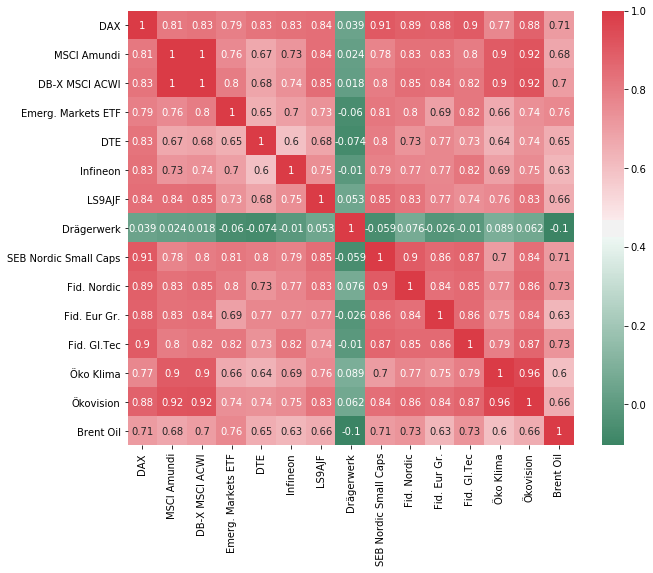

In [7]:
fig, ax = plt.subplots(figsize=(10,8))         # Sample figsize in inches

#corr.style.background_gradient(cmap='coolwarm')
cmap = sns.diverging_palette(150, 10, as_cmap=True)

sns.heatmap(correlation_matrix,
            xticklabels=correlation_matrix.columns,
            yticklabels=correlation_matrix.columns,
            cbar_kws={},
            cmap = cmap,
            annot=True,
            ax=ax)